In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [103]:
#read dataset
data = pd.read_csv("/content/drive/MyDrive/CIND 820 Capstone Project/merged_completedata.csv")
data.shape

(78032, 28)

In [104]:
# filter dataframe to 2019 records
data = data[data['Year'] >= 2019] 

In [105]:
data.head()

,RecordID,X,Y,FID,BusinessID,Name,Address,StreetNo,StreetName,BldgNo,...,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,Year,isnew,Closed
46689,46690,-79.665386,43.684736,1,7,Peel Car & Truck Rentals,7050 Bramalea Rd,7050,Bramalea Rd,Yes,...,Yes,Yes,Yes,Yes,1,607567.2334,4.837723e+06,2019,No,No
46690,46691,-79.642760,43.593515,2,4246,Real Fruit Bubble Tea,100 City Centre Dr,100,City Centre Dr,No,...,No,No,No,Yes,2,609556.5032,4.827621e+06,2019,Yes,No
46691,46692,-79.667311,43.682752,3,10,Unifor 2002,7015 Tranmere Dr,7015,Tranmere Dr,No,...,Yes,Yes,Yes,Yes,3,607415.6044,4.837500e+06,2019,No,No
46692,46693,-79.629235,43.698932,4,4247,Laura with Plus and Petites,100 City Centre Dr,100,City Centre Dr,No,...,No,No,No,Yes,2,610454.8654,4.839347e+06,2019,Yes,No
46693,46694,-79.629235,43.698932,5,4250,Footlocker,100 City Centre Dr,100,City Centre Dr,No,...,No,No,No,No,4,610454.8654,4.839347e+06,2019,Yes,No


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31343 entries, 46689 to 78031
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RecordID    31343 non-null  int64  
 1   X           31343 non-null  float64
 2   Y           31343 non-null  float64
 3   FID         31343 non-null  int64  
 4   BusinessID  31343 non-null  int64  
 5   Name        31343 non-null  object 
 6   Address     31343 non-null  object 
 7   StreetNo    31343 non-null  int64  
 8   StreetName  31343 non-null  object 
 9   BldgNo      31343 non-null  object 
 10  UnitNo      31343 non-null  object 
 11  PostalCode  31343 non-null  object 
 12  Location    31343 non-null  object 
 13  Ward        31343 non-null  int64  
 14  NAICSCode   31343 non-null  int64  
 15  NAICSCat    31343 non-null  object 
 16  NAICSDescr  31343 non-null  object 
 17  Phone       31343 non-null  object 
 18  Fax         31343 non-null  object 
 19  TollFree    31343 non

In [107]:
#NAICSCode back to object as it is nominal not ordinal
data['NAICSCode'] = data['NAICSCode'].astype(str)

In [108]:
#drop unique fields
data.drop(['RecordID','FID','BusinessID','Name','Address', 'StreetNo','StreetName','NAICSDescr','Year'], axis=1, inplace=True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31343 entries, 46689 to 78031
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           31343 non-null  float64
 1   Y           31343 non-null  float64
 2   BldgNo      31343 non-null  object 
 3   UnitNo      31343 non-null  object 
 4   PostalCode  31343 non-null  object 
 5   Location    31343 non-null  object 
 6   Ward        31343 non-null  int64  
 7   NAICSCode   31343 non-null  object 
 8   NAICSCat    31343 non-null  object 
 9   Phone       31343 non-null  object 
 10  Fax         31343 non-null  object 
 11  TollFree    31343 non-null  object 
 12  EMail       31343 non-null  object 
 13  WebAddress  31343 non-null  object 
 14  EmplRange   31343 non-null  int64  
 15  CENT_X      31343 non-null  float64
 16  CENT_Y      31343 non-null  float64
 17  isnew       31343 non-null  object 
 18  Closed      31343 non-null  object 
dtypes: float64(4), int64(

In [110]:
#decribe categorical data
data.describe(include='O')
#There is none if I get an error

,BldgNo,UnitNo,PostalCode,Location,NAICSCode,NAICSCat,Phone,Fax,TollFree,EMail,WebAddress,isnew,Closed
count,31343,31343,31343,31343,31343,31343,31343,31343,31343,31343,31343,31343,31343
unique,2,2,37,56,24,19,2,2,2,2,2,2,2
top,No,Yes,L4W,Northeast EA (West),81,Retail Trade,Yes,Yes,No,Yes,Yes,No,No
freq,29769,20869,5084,8325,3576,4377,30965,19310,26636,19963,23174,28576,28629


In [111]:
#if there is categorical data then factorize it
data['WebAddress'] = pd.factorize(data['WebAddress'])[0]
data['BldgNo'] = pd.factorize(data['BldgNo'])[0]
data['Fax'] = pd.factorize(data['Fax'])[0]
data['TollFree'] = pd.factorize(data['TollFree'])[0]
data['UnitNo'] = pd.factorize(data['UnitNo'])[0]
data['isnew'] = pd.factorize(data['isnew'])[0]
data['Closed'] = pd.factorize(data['Closed'])[0]
data['NAICSCode'] = pd.factorize(data['NAICSCode'])[0]
data['NAICSCat'] = pd.factorize(data['NAICSCat'])[0]
data['Location'] = pd.factorize(data['Location'])[0]
data['Phone'] = pd.factorize(data['Phone'])[0]
data['EMail'] = pd.factorize(data['EMail'])[0]
data['PostalCode'] = pd.factorize(data['PostalCode'])[0]

In [112]:
#decribe categorical data
data.describe(include='O')
#There is none if I get an error

ValueError: ignored

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31343 entries, 46689 to 78031
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           31343 non-null  float64
 1   Y           31343 non-null  float64
 2   BldgNo      31343 non-null  int64  
 3   UnitNo      31343 non-null  int64  
 4   PostalCode  31343 non-null  int64  
 5   Location    31343 non-null  int64  
 6   Ward        31343 non-null  int64  
 7   NAICSCode   31343 non-null  int64  
 8   NAICSCat    31343 non-null  int64  
 9   Phone       31343 non-null  int64  
 10  Fax         31343 non-null  int64  
 11  TollFree    31343 non-null  int64  
 12  EMail       31343 non-null  int64  
 13  WebAddress  31343 non-null  int64  
 14  EmplRange   31343 non-null  int64  
 15  CENT_X      31343 non-null  float64
 16  CENT_Y      31343 non-null  float64
 17  isnew       31343 non-null  int64  
 18  Closed      31343 non-null  int64  
dtypes: float64(4), int64(

In [114]:
data.head()

,X,Y,BldgNo,UnitNo,PostalCode,Location,Ward,NAICSCode,NAICSCat,Phone,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,isnew,Closed
46689,-79.665386,43.684736,0,0,0,0,5,0,0,0,0,0,0,0,1,607567.2334,4.837723e+06,0,0
46690,-79.642760,43.593515,1,0,1,1,4,1,1,1,1,1,1,0,2,609556.5032,4.827621e+06,1,0
46691,-79.667311,43.682752,1,0,0,0,5,2,2,0,0,0,0,0,3,607415.6044,4.837500e+06,0,0
46692,-79.629235,43.698932,1,0,1,2,4,0,0,0,1,1,1,0,2,610454.8654,4.839347e+06,1,0
46693,-79.629235,43.698932,1,0,1,2,4,0,0,0,1,1,1,1,4,610454.8654,4.839347e+06,1,0


In [115]:
importances = data.drop('Closed', axis=1).apply(lambda x: x.corr(data.Closed))
indices = np.argsort(importances)
print(importances[indices])

CENT_Y       -0.060260
EmplRange    -0.041116
X            -0.026877
UnitNo       -0.025721
PostalCode   -0.010325
TollFree     -0.008072
Y            -0.002403
Location      0.001719
CENT_X        0.003526
Ward          0.004591
BldgNo        0.005347
WebAddress    0.009212
Phone         0.011712
Fax           0.014476
NAICSCode     0.020264
NAICSCat      0.021286
EMail         0.031282
isnew         0.049747
dtype: float64


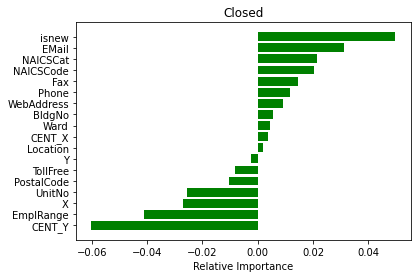

In [116]:
names=['X','Y','BldgNo','UnitNo','PostalCode','Location','Ward','NAICSCode','NAICSCat','Phone','Fax','TollFree','EMail','WebAddress','EmplRange','CENT_X','CENT_Y','isnew']
plt.title('Closed')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [136]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.04:
        print(names[i])
    #nothing is greater than .4  only 0.04! So nothing is correlated to Closed. So all the code after this will yield nothing of significance.

EmplRange
CENT_Y
isnew


In [118]:
X= data[ ['EmplRange','CENT_Y','isnew']]


In [119]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

EmplRange  is not correlated  with  CENT_Y
EmplRange  is not correlated  with  isnew
CENT_Y  is not correlated  with  EmplRange
CENT_Y  is not correlated  with  isnew
isnew  is not correlated  with  EmplRange
isnew  is not correlated  with  CENT_Y


In [132]:
X = data[ ['EmplRange']]

In [133]:
y = data['Closed']

In [134]:
mi = mutual_info_regression(X, y)

<Axes: >

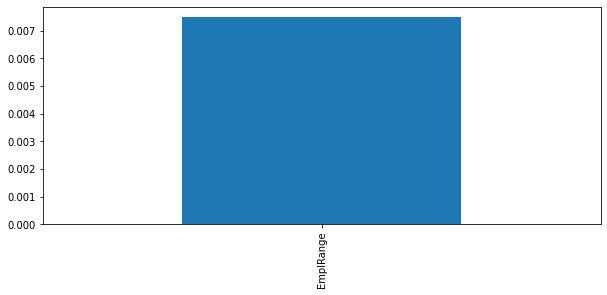

In [135]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))